<a href="https://colab.research.google.com/github/SenaKymk/pupilica_ai_bootcamp_assignment/blob/main/decisionTreeCancerDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
erdemtaha_cancer_data_path = kagglehub.dataset_download('erdemtaha/cancer-data')

print('Data source import complete.')


100%|██████████| 48.6k/48.6k [00:00<00:00, 41.2MB/s]

Extracting files...
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#
cancer_data = pd.read_csv('/content/Cancer_Data.csv')
print(cancer_data.columns)
cancer_data.head()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
df= pd.DataFrame(cancer_data)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
X = cancer_data.drop('diagnosis', axis=1)  # Bağımsız değişkenler
y = cancer_data['diagnosis']

In [9]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)


In [10]:
tree_cfl = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=42)
tree_cfl.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [11]:
y_pred = tree_cfl.predict(X_test)

In [12]:
accuracy_score= accuracy_score(y_test, y_pred)
accuracy_score

0.9385964912280702

In [13]:
confusion_matrix= confusion_matrix(y_test, y_pred)
confusion_matrix

array([[68,  3],
       [ 4, 39]])

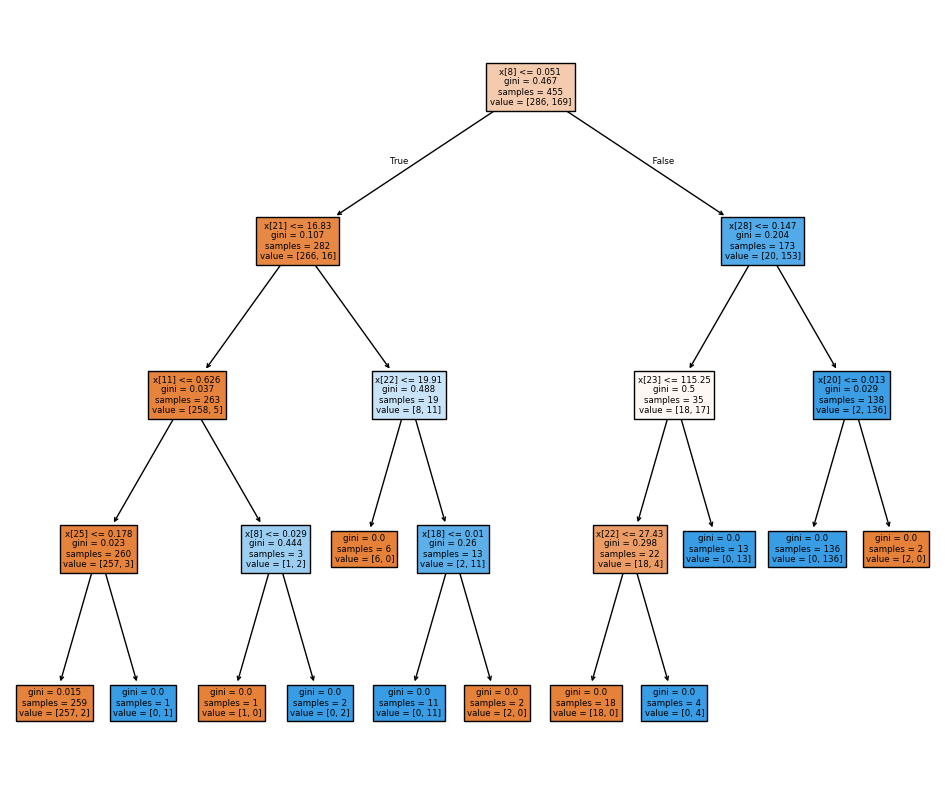

In [14]:
plt.figure(figsize=(12,10))
plot_tree(tree_cfl, filled=True)
plt.show()

In [15]:
train_accuracy = tree_cfl.score(X_train, y_train)
test_accuracy = tree_cfl.score(X_test, y_test)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9956043956043956
Test Accuracy: 0.9385964912280702


In [16]:
feature_importances = tree_cfl.feature_importances_
feature_importances

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.71097778, 0.        ,
       0.        , 0.01221069, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.0162341 , 0.        ,
       0.0189077 , 0.05329492, 0.05959094, 0.05247428, 0.        ,
       0.00940897, 0.        , 0.        , 0.06690062, 0.        ,
       0.        , 0.        ])

Feature Importances Analysis

In [17]:
import pandas as pd

# Feature importances'ı DataFrame yap
feature_importances_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': tree_cfl.feature_importances_
})

# Sıfır olanları bul
zero_importance_features = feature_importances_df[feature_importances_df['importance'] == 0]['feature'].tolist()

print("0 importance olan featurelar:")
print(zero_importance_features)


0 importance olan featurelar:
['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'symmetry_se', 'area_worst', 'compactness_worst', 'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']


In [18]:
X_train_reduced = X_train.drop(zero_importance_features, axis=1)
X_test_reduced = X_test.drop(zero_importance_features, axis=1)

In [19]:
from sklearn.tree import DecisionTreeClassifier

# Yeni model
tree_cfl_reduced = DecisionTreeClassifier(random_state=42)
tree_cfl_reduced.fit(X_train_reduced, y_train)

# Yeni accuracy
train_acc_reduced = tree_cfl_reduced.score(X_train_reduced, y_train)
test_acc_reduced = tree_cfl_reduced.score(X_test_reduced, y_test)

print("Yeni Train Accuracy:", train_acc_reduced)
print("Yeni Test Accuracy:", test_acc_reduced)


Yeni Train Accuracy: 1.0
Yeni Test Accuracy: 0.9385964912280702
